In [56]:
from utils import *
# Deactivate warnings
import warnings
warnings.filterwarnings('ignore')


In [57]:
df = pd.read_csv("data_W2023.csv")
df.columns = ["date", "USDCAD"]

In [58]:
df.head()

,date,USDCAD
0,01-Jan-1973,1.168677
1,01-Feb-1973,1.166112
2,01-Mar-1973,1.258816
3,01-Apr-1973,1.260858
4,01-May-1973,1.288661


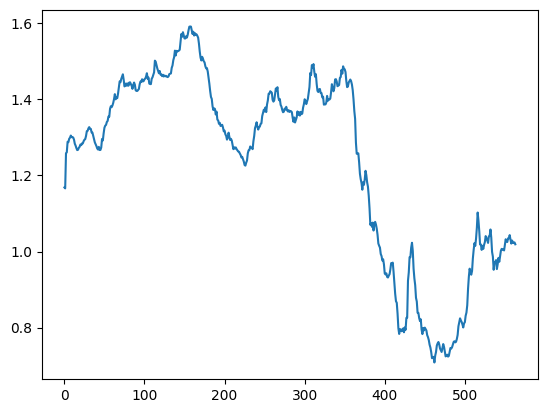

In [59]:
plt.plot(df["USDCAD"])

In [60]:
df = df[df["date"] < "2020-01-01"]

In [61]:
df.shape

(564, 2)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 564 entries, 0 to 563
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    564 non-null    object 
 1   USDCAD  564 non-null    float64
dtypes: float64(1), object(1)
memory usage: 13.2+ KB


In [63]:
df["date"] = pd.to_datetime(df["date"])

In [64]:
df["log_100_USDCAD"] = np.log(100 * df["USDCAD"])

In [65]:
df.tail()

,date,USDCAD,log_100_USDCAD
559,2019-08-01,1.028977,4.633736
560,2019-09-01,1.023574,4.628470
561,2019-10-01,1.022401,4.627324
562,2019-11-01,1.024087,4.628971
563,2019-12-01,1.018995,4.623987


Text(0.5, 1.0, 'log 100 USDCAD=x')

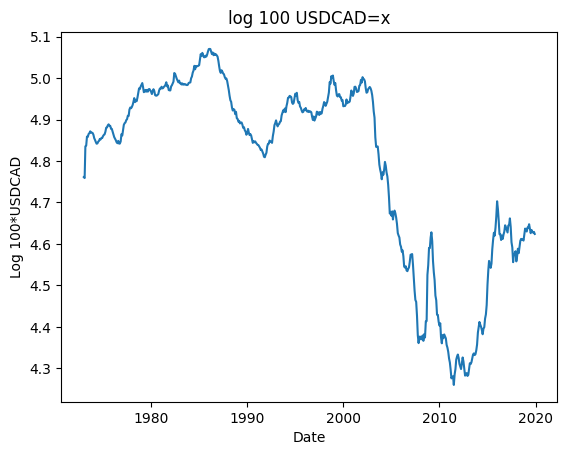

In [66]:
plt.plot(df["date"], df["log_100_USDCAD"])
plt.xlabel("Date")
plt.ylabel(f"Log 100*USDCAD")
plt.title("log 100 USDCAD=x")


In [67]:
#1b
T = df.shape[0]
T

564

In [68]:
trend = np.arange(1, T + 1)
ones = np.ones(T)

In [69]:
X = np.column_stack((ones, trend, trend ** 2))
X

array([[1.00000e+00, 1.00000e+00, 1.00000e+00],
       [1.00000e+00, 2.00000e+00, 4.00000e+00],
       [1.00000e+00, 3.00000e+00, 9.00000e+00],
       ...,
       [1.00000e+00, 5.62000e+02, 3.15844e+05],
       [1.00000e+00, 5.63000e+02, 3.16969e+05],
       [1.00000e+00, 5.64000e+02, 3.18096e+05]])

In [70]:
Y = df["log_100_USDCAD"].values

In [71]:
B = np.linalg.inv(X.T @ X) @ X.T @ Y

In [72]:
B

array([ 4.90909695e+00,  7.33070085e-04, -3.06987062e-06])

In [73]:
df["res"] = Y - X @ B

In [74]:
df

,date,USDCAD,log_100_USDCAD,res
0,1973-01-01,1.168677,4.761042,-0.148785
1,1973-02-01,1.166112,4.758845,-0.151705
2,1973-03-01,1.258816,4.835342,-0.075927
3,1973-04-01,1.260858,4.836962,-0.075018
4,1973-05-01,1.288661,4.858774,-0.053912
...,...,...,...,...
559,2019-08-01,1.028977,4.633736,0.276831
560,2019-09-01,1.023574,4.628470,0.274274
561,2019-10-01,1.022401,4.627324,0.275842
562,2019-11-01,1.024087,4.628971,0.280210


Text(0.5, 1.0, 'Determinist trend deviation')

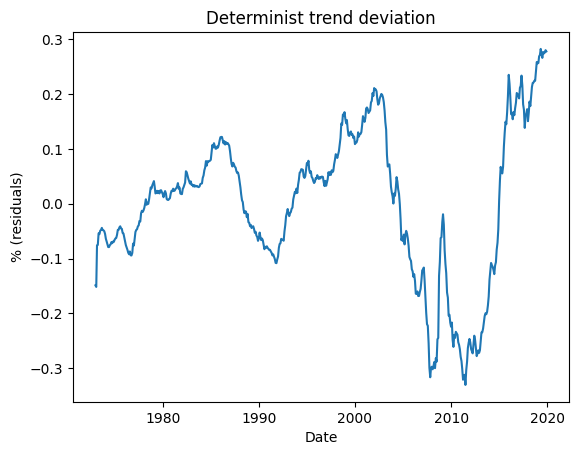

In [75]:
plt.plot(df["date"], df["res"])
plt.xlabel("Date")
plt.ylabel(f"% (residuals)")
plt.title("Determinist trend deviation")

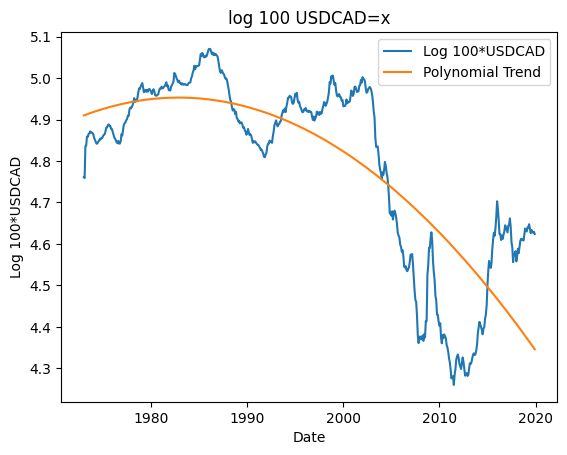

In [76]:
plt.plot(df["date"], df["log_100_USDCAD"], label="Log 100*USDCAD")
plt.plot(df["date"], X @ B, label="Polynomial Trend")
plt.xlabel("Date")
plt.ylabel(f"Log 100*USDCAD")
plt.title("log 100 USDCAD=x")
plt.legend()


In [77]:
#1c
df["stoch_USDCAD"] = df["log_100_USDCAD"].diff() * 100
df.dropna(inplace=True) # drop first row
df.shape


(563, 5)

In [78]:
df.head()

,date,USDCAD,log_100_USDCAD,res,stoch_USDCAD
1,1973-02-01,1.166112,4.758845,-0.151705,-0.219688
2,1973-03-01,1.258816,4.835342,-0.075927,7.649618
3,1973-04-01,1.260858,4.836962,-0.075018,0.162085
4,1973-05-01,1.288661,4.858774,-0.053912,2.181160
5,1973-06-01,1.287592,4.857944,-0.055441,-0.083011


Text(0.5, 1.0, 'Hypothesis: stochastic trend')

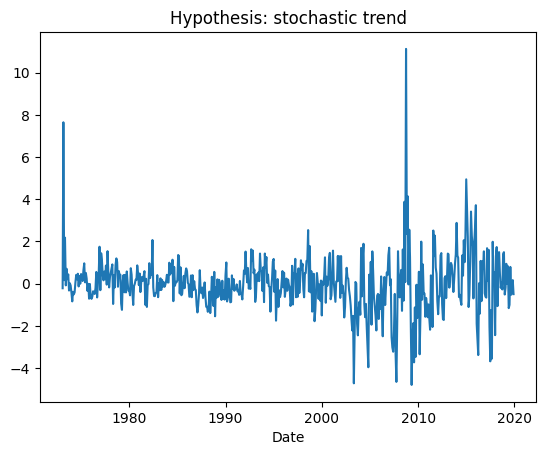

In [79]:
plt.plot(df["date"], df["stoch_USDCAD"])
plt.xlabel("Date")
plt.title("Hypothesis: stochastic trend")

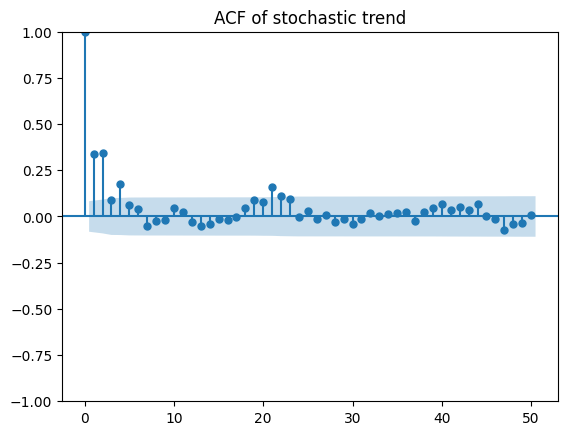

In [105]:
# 1d
sm.graphics.tsa.plot_acf(df["stoch_USDCAD"].dropna(), lags=50, title="ACF of stochastic trend");


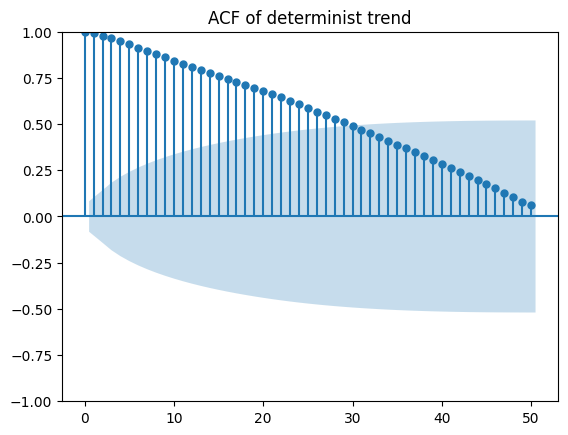

In [106]:
sm.graphics.tsa.plot_acf(df["res"].dropna(), lags=50, title="ACF of determinist trend");

Pour commencer, on sait que l'autocorrélation non conditionnelle est une mesure de la dépendance temporelle, ce qui nous permet à partir des graphiques d'autocorrélations, de conclure sur la nature stationnaire de la série. On attend d'une série stationnaire des mouvements autour d'une moyenne et de bornes qui sont fixes dans le temps.


- Concernant le graphique des autocorrélations de la tendance déterministe polynomiale, on observe que les autocorrélations tendent lentement vers 0. La moyenne des autocorrélations n'est donc pas nulle. On peut donc conclure que la série `log_100_USDCAD` n'est pas stationnaire.
- D'autre part, on observe que les autocorrélations de la série à tendance stochastique tendent rapidement vers 0 pour les 50 lags testés, avec une moyenne qui à l'air nulle en fonction du nombre de lags.

On sait que tout processus stationnaire est caractérisé par une courte mémoire: $Corr(y_t, y_{t-k}) \rightarrow 0$ lorsque $k$ augmente. On peut donc conclure que la série `stoch_USDCAD` est stationnaire.


In [107]:
#1e

ljung_box_test = sm.stats.acorr_ljungbox(df["stoch_USDCAD"].dropna(), lags=18)
ljung_box_test


,lb_stat,lb_pvalue
1,63.837877,1.350911e-15
2,130.932915,3.700656e-29
3,135.330291,3.838951e-29
4,153.014709,4.598552e-32
5,155.108804,1.090679e-31
6,156.108470,3.947901e-31
7,157.514338,1.069480e-30
8,157.903502,4.387614e-30
9,158.157909,1.792324e-29
10,159.368871,4.373649e-29


In [110]:
# verify that the column lb_pvalue have all is p-values inferior to the 5% threshold
all(ljung_box_test["lb_pvalue"] < 0.05)

True

On rappelle que le test de Ljung-Box permet de tester l'hypothèse nulle d'absence d'autocorrélation pour les termes bruits blancs : $H_0: Corr(y_t, y_{t-k}) = 0$.

On remarque que les `lb_pvalues` (p-values pour le test de Ljung-Box) sont très faibles pour les lags 1 à 18. On peut donc rejeter l'hypothèse nulle d'absence de corrélation pour ces lags au seuil de 5%. On peut donc conclure que les résidus ne sont pas indépendants et que la série est autocorrélée, ce qui implique que le terme d'erreur de la série `stoch_USDCAD` n'est pas bruit blanc.

# Partie 2. Choix du modèle (30 points)

Considérons les 8 modèles suivants :
- AR(1): $y_t = \delta + \phi_1 y_{t-1} + \epsilon_t$
- AR(2): $y_t = \delta + \phi_1 y_{t-1} + \phi_2 y_{t-2} + \epsilon_t$
- AR(3): $y_t = \delta + \phi_1 y_{t-1} + \phi_2 y_{t-2} + \phi_3 y_{t-3} + \epsilon_t$
- AR(4): $y_t = \delta + \phi_1 y_{t-1} + \phi_2 y_{t-2} + \phi_3 y_{t-3} + \phi_4 y_{t-4} + \epsilon_t$
- ARMA(1,1): $y_t = \delta + \phi_1 y_{t-1} - \theta_1 \epsilon_{t-1} + \epsilon_t$
- ARMA(2,2): $y_t = \delta + \phi_1 y_{t-1} + \phi_2 y_{t-2} - \theta_1 \epsilon_{t-1} - \theta_2 \epsilon_{t-2} + \epsilon_t$
- ARMA(3,3): $y_t = \delta + \phi_1 y_{t-1} + \phi_2 y_{t-2} + \phi_3 y_{t-3} - \theta_1 \epsilon_{t-1} - \theta_2 \epsilon_{t-2} - \theta_3 \epsilon_{t-3} + \epsilon_t$
- ARMA(4,4): $y_t = \delta + \phi_1 y_{t-1} + \phi_2 y_{t-2} + \phi_3 y_{t-3} + \phi_4 y_{t-4} - \theta_1 \epsilon_{t-1} - \theta_2 \epsilon_{t-2} - \theta_3 \epsilon_{t-3} - \theta_4 \epsilon_{t-4} + \epsilon_t$

In [143]:
def compute_eigenvalues(arma_model: ARIMAResultsWrapper) -> np.ndarray:
    """Compute the eigenvalues of the ARMA model."""

    arparams = arma_model.arparams # store the AR parameters
    if len(arparams) == 1: # if there is only one AR parameter (True for AR(1) model)
        eigmat = np.array([[arparams[0]]])
    elif len(arparams) == 2:
        eigmat = np.array([[arparams[0], arparams[1]],
                           [1, 0]])
    elif len(arparams) == 3:
        eigmat = np.array([[arparams[0], arparams[1], arparams[2]],
                           [1, 0, 0],
                           [0, 1, 0]])
    elif len(arparams) == 4:
        eigmat = np.array([[arparams[0], arparams[1], arparams[2], arparams[3]],
                           [1, 0, 0, 0],
                           [0, 1, 0, 0],
                           [0, 0, 1, 0]])
    else:
        raise ValueError("The number of AR parameters must be between 1 and 4")

    return np.linalg.eigvals(eigmat) # compute the eigenvalues of the matrix

In [144]:
def check_stationarity(eigenvalues: np.ndarray) -> bool:
    return all(np.abs(eigenvalues) < 1)

In [145]:
order_list = [([1], 0, [0]),
               ([1, 2], 0, [0]),
               ([1, 2, 3], 0, [0]),
               ([1, 2, 3, 4], 0, [0]),
               ([1], 0, [1]),
               ([1, 2], 0, [1, 2]),
               ([1, 2, 3], 0, [1, 2, 3]),
               ([1, 2, 3, 4], 0, [1, 2, 3, 4])]


In [113]:
arma_models = {}

for order in order_list:
    print(f"Autoregressive lags: {order[0]}")
    print(f"Moving average lags: {order[2]}")

    model = ARIMA(df["stoch_USDCAD"].dropna(), order=order)
    results = model.fit()
    print(results.summary())
    arma_models[f"ARMA({order[0][-1]},{order[2][-1]})"] = results


Autoregressive lags: [1]
Moving average lags: [0]
                               SARIMAX Results                                
Dep. Variable:           stoch_USDCAD   No. Observations:                  563
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -919.472
Date:                Sat, 25 Feb 2023   AIC                           1844.945
Time:                        10:20:24   BIC                           1857.945
Sample:                             0   HQIC                          1850.020
                                - 563                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0249      0.086     -0.291      0.771      -0.193       0.143
ar.L1          0.3353      0.031     10.804      0.000       0.274       0.396
si

In [146]:
compute_eigenvalues(arma_models["ARMA(1,1)"])

array([0.72848943])

In [147]:
arma_models["ARMA(1,1)"].arparams

array([0.72848943])

In [148]:
df_stationarity = pd.DataFrame(index=arma_models.keys(), columns=["is_stationary"])
for model_name, model in arma_models.items():
    eigenvalues = compute_eigenvalues(model)
    df_stationarity.loc[model_name, "is_stationary"] = check_stationarity(eigenvalues)
df_stationarity

,is_stationary
"ARMA(1,0)",True
"ARMA(2,0)",True
"ARMA(3,0)",True
"ARMA(4,0)",True
"ARMA(1,1)",True
"ARMA(2,2)",True
"ARMA(3,3)",True
"ARMA(4,4)",True


In [87]:
def compute_lr_statistic(reduced_ll: float, full_ll: float) -> float:
    return -2 * (reduced_ll - full_ll)

In [88]:
def compute_p_value_llr(reduced_ll: float, full_ll: float, df: int = 1) -> float:
    lr_statistic = compute_lr_statistic(reduced_ll, full_ll)
    p_val = sp.stats.chi2.sf(lr_statistic, df=df)
    return p_val

In [89]:
arma_models["ARMA(4,4)"].arroots


array([-1.27044227-0.j        ,  0.58783978-0.83721156j,
        0.58783978+0.83721156j,  1.83290223-0.j        ])

- H0: Le modèle complet ARMA(4,4) fit les données aussi bien que le modèle réduit ARMA(3,3). Par conséquent, on devrait choisir le modèle ARMA(3,3) car il est plus simple.
- H1: Le modèle complet ARMA(4,4) fit mieux les données que le modèle réduit ARMA(3,3). Par conséquent, on devrait choisir le modèle ARMA(4,4) car il est plus précis.



In [90]:
compute_p_value_llr(arma_models["ARMA(3,3)"].llf,
                    arma_models["ARMA(4,4)"].llf,
                    df=2)

0.28949106543462216

Comme la p-value n'est pas inférieure au seuil significatif de 5%, nous ne pouvons pas rejeter l'hypothèse nulle. On peut donc conclure que le modèle ARMA(3,3) fit aussi bien les données que le modèle ARMA(4,4).

- H0: Le modèle complet ARMA(3,3) fit les données aussi bien que le modèle réduit ARMA(2,2). Par conséquent, on devrait choisir le modèle ARMA(2,2) car il est plus simple.
- H1: Le modèle complet ARMA(3,3) fit mieux les données que le modèle réduit ARMA(2,2). Par conséquent, on devrait choisir le modèle ARMA(3,3) car il est plus précis.

In [91]:
compute_p_value_llr(arma_models["ARMA(2,2)"].llf,
                    arma_models["ARMA(3,3)"].llf,
                    df=2)

0.3676921427657294

Comme la p-value n'est pas inférieure au seuil significatif de 5%, nous ne pouvons pas rejeter l'hypothèse nulle. On peut donc conclure que le modèle ARMA(2,2) fit aussi bien les données que le modèle ARMA(3,3).

- H0: Le modèle complet ARMA(2,2) fit les données aussi bien que le modèle réduit ARMA(1,1). Par conséquent, on devrait choisir le modèle ARMA(1,1) car il est plus simple.
- H1: Le modèle complet ARMA(2,2) fit mieux les données que le modèle réduit ARMA(1,1). Par conséquent, on devrait choisir le modèle ARMA(2,2) car il est plus précis.

In [92]:
compute_p_value_llr(arma_models["ARMA(1,1)"].llf,
                    arma_models["ARMA(2,2)"].llf,
                    df=2)

5.093383915441103e-07

On remarque que la p-value est inférieure au seuil significatif de 5%. On peut donc rejeter l'hypothèse nulle. On peut donc conclure que le modèle ARMA(2,2) fit mieux les données que le modèle ARMA(1,1).

**On peut donc conclure que d'après le test du ratio de vraisemblance, le modèle ARMA(2,2) est le meilleur modèle pour modéliser les données parmis les modèles ARMA.**

On effectue le même raisonnement avec les modèles AR :

- H0: Le modèle complet AR(4) fit les données aussi bien que le modèle réduit AR(3). Par conséquent, on devrait choisir le modèle AR(3) car il est plus simple.
- H1: Le modèle complet AR(4) fit mieux les données que le modèle réduit AR(3). Par conséquent, on devrait choisir le modèle AR(4) car il est plus précis.

In [93]:
compute_p_value_llr(arma_models["ARMA(3,0)"].llf,
                    arma_models["ARMA(4,0)"].llf,
                    df=1)

0.006280983257624901

On remarque que la p-value est inférieure au seuil significatif de 5%. On peut donc rejeter l'hypothèse nulle. On peut donc conclure que le modèle AR(4) fit mieux les données que le modèle AR(3).

- H0: Le modèle complet AR(4) fit les données aussi bien que le modèle réduit AR(2). Par conséquent, on devrait choisir le modèle AR(2) car il est plus simple.
- H1: Le modèle complet AR(4) fit mieux les données que le modèle réduit AR(2). Par conséquent, on devrait choisir le modèle AR(4) car il est plus précis.

In [94]:
compute_p_value_llr(arma_models["ARMA(2,0)"].llf,
                    arma_models["ARMA(4,0)"].llf,
                    df=2)

0.0006815655368223662

On remarque que la p-value est inférieure au seuil significatif de 5%. On peut donc rejeter l'hypothèse nulle. On peut donc conclure que le modèle AR(4) fit mieux les données que le modèle AR(2).

- H0: Le modèle complet AR(4) fit les données aussi bien que le modèle réduit AR(1). Par conséquent, on devrait choisir le modèle AR(1) car il est plus simple.
- H1: Le modèle complet AR(4) fit mieux les données que le modèle réduit AR(1). Par conséquent, on devrait choisir le modèle AR(4) car il est plus précis.

In [95]:
compute_p_value_llr(arma_models["ARMA(1,0)"].llf,
                    arma_models["ARMA(4,0)"].llf,
                    df=3)

2.7200521206435115e-12

On remarque que la p-value est inférieure au seuil significatif de 5%. On peut donc rejeter l'hypothèse nulle. On peut donc conclure que le modèle AR(4) fit mieux les données que le modèle AR(1).

**On peut donc conclure que d'après le test du ratio de vraisemblance, le modèle AR(4) est le meilleur modèle pour modéliser les données parmis les modèles AR.**

In [96]:
# BIC test between AR(4) and ARMA(2,2)
arma_models["ARMA(2,2)"].bic, arma_models["ARMA(4,0)"].bic

(1822.7987872439364, 1820.0598903433222)

In [97]:
df_bic = pd.DataFrame({"BIC": [arma_models["ARMA(2,2)"].bic, arma_models["ARMA(4,0)"].bic]},
                      index=["ARMA(2,2)", "AR(4)"])
df_bic

,BIC
"ARMA(2,2)",1822.798787
AR(4),1820.059890


On remarque que le BIC du modèle AR(4) est plus petit que celui du modèle ARMA(2,2). Par conséquent, et d'après le critère d'information de Bayes, le modèle AR(4) est le meilleur modèle pour modéliser les données.

In [98]:
#2c evaluate the white noise hypothesis for each of the two models.
resid_arma_2_2 = arma_models["ARMA(2,2)"].resid
resid_arma_4_0 = arma_models["ARMA(4,0)"].resid
resid_arma_1_0 = arma_models["ARMA(1,0)"].resid


In [99]:
sm.stats.acorr_ljungbox(resid_arma_2_2, lags=18, return_df=True)

,lb_stat,lb_pvalue
1,0.019365,0.889326
2,0.687187,0.709217
3,0.707994,0.871322
4,1.595710,0.809563
5,4.884819,0.430098
6,5.217740,0.516205
7,6.400846,0.493800
8,7.974911,0.435925
9,8.162355,0.517871
10,10.680986,0.382906


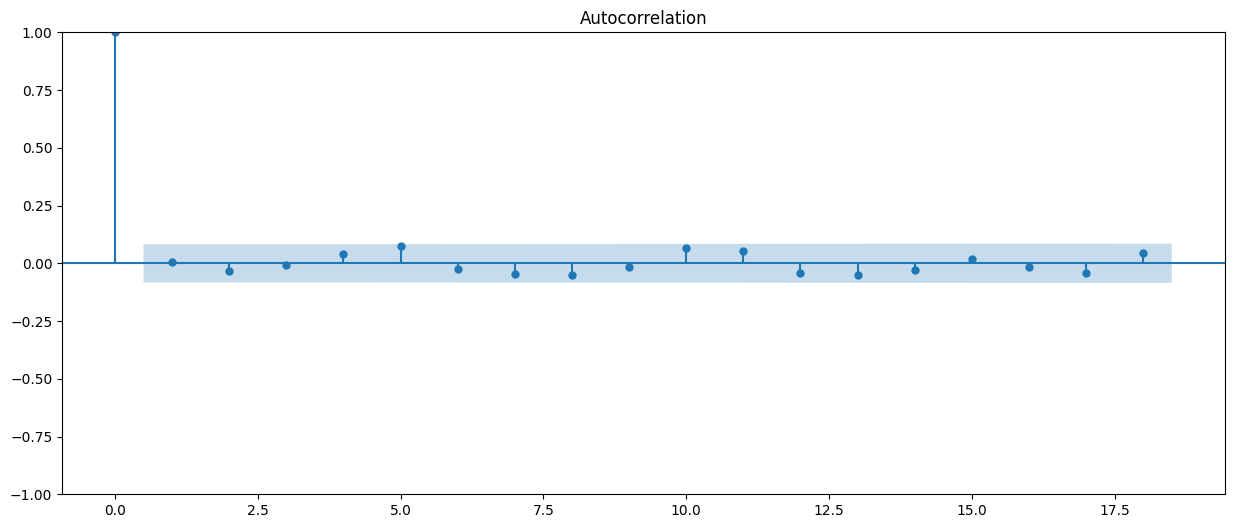

In [100]:
# autocorrelation plot
fig, ax = plt.subplots(figsize=(15, 6))
fig = sm.graphics.tsa.plot_acf(resid_arma_2_2, lags=18, ax=ax)


In [101]:
sm.stats.acorr_ljungbox(resid_arma_4_0, lags=18, return_df=True)

,lb_stat,lb_pvalue
1,0.022608,0.880481
2,0.160005,0.923114
3,0.284247,0.962964
4,0.286832,0.990648
5,0.827707,0.975233
6,1.626631,0.950644
7,3.507857,0.834393
8,4.859857,0.772444
9,5.277459,0.809482
10,7.568857,0.670869


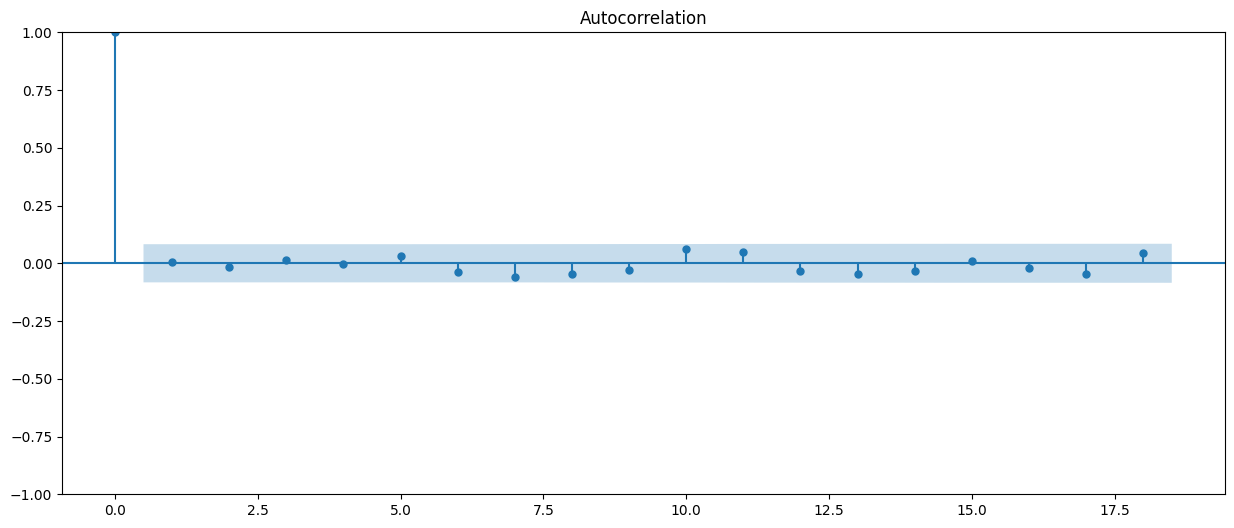

In [102]:
# autocorrelation plot
fig, ax = plt.subplots(figsize=(15, 6))
fig = sm.graphics.tsa.plot_acf(resid_arma_4_0, lags=18, ax=ax)

In [103]:
sm.stats.acorr_ljungbox(resid_arma_1_0, lags=18, return_df=True)

,lb_stat,lb_pvalue
1,4.261575,3.898377e-02
2,45.933833,1.060706e-10
3,50.167877,7.357811e-11
4,65.664649,1.863951e-13
5,65.689926,8.060455e-13
6,67.027592,1.661358e-12
7,69.662315,1.728765e-12
8,69.683916,5.680488e-12
9,70.341134,1.305289e-11
10,72.165245,1.690236e-11
